In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
ruta="https://raw.githubusercontent.com/AprendizajeAutomaticoUJI/DataSets/master/evolucion_del_euribor_mensual.csv"
data = df = pd.read_csv(ruta, decimal=",", sep=";")

print(data)



      Año     Periodo  Euribor
0    1999       Enero     3.06
1    1999     Febrero     3.03
2    1999       Marzo     3.05
3    1999       Abril     2.76
4    1999        Mayo     2.68
..    ...         ...      ...
305  2024       Junio     3.65
306  2024       Julio     3.53
307  2024      Agosto     3.17
308  2024  Septiembre     2.94
309  2024     Octubre     2.69

[310 rows x 3 columns]


calculamos media deslizante sobre los datos para identificar las tendencias

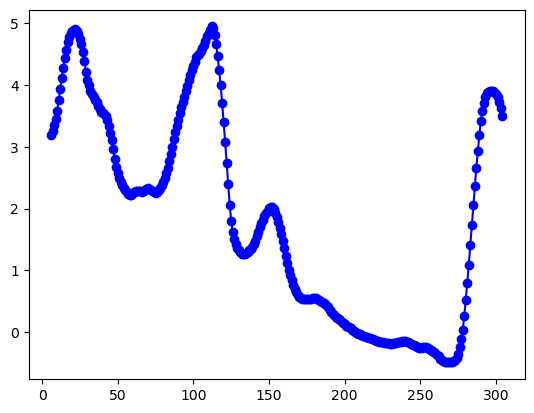

In [50]:
data["Promedio"] = data["Euribor"].rolling(12, center=True).mean()
plt.plot(df["Promedio"], label="Euribor_promedio", color='b', marker='o')

In [51]:
mes_pico=[25,110,150,280]
print("AÑOS CON PICO DE EURÍBOR")
for i in range(len(mes_pico)):
    print(1999+(mes_pico[i]//12))

AÑOS CON PICO DE EURÍBOR
2001
2008
2011
2022


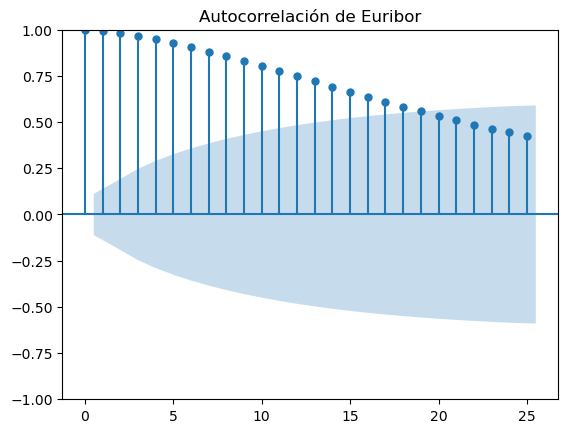

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data["Euribor"], title="Autocorrelación de Euribor");
#plot_acf(data["Año"], title="Autocorrelación de Euribor");

In [53]:
data["Euribor"].autocorr(12) 



0.7705766299808152

tiene una correlacion de 0.77 con el valor 12 meses antes o después ,por tanto parece tener una relación cíclica anual el Euríbor.

In [112]:
#Funcion que coge steps observaciones(guardadas en dataX) para predecir 
# la siguiente observacion a las anteriores (que se guarda en dataY) 
"""def get_data(df, steps):      
    dataX = []
    dataY = []
    for i in range(len(df)-steps-1):
        a = df[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(df[i+steps, 0])
    return np.array(dataX), np.array(dataY)"""
def get_data(df, steps,col):      
    dataX = []
    dataY = []
    
    # Recorre el DataFrame para crear las secuencias
    for i in range(len(df) - steps - 1):
        # Usamos iloc para acceder correctamente a las filas y columnas
        a = df.iloc[i:(i + steps), col].values  # Selecciona las filas desde i hasta i+steps de la primera columna
        dataX.append(a)
        dataY.append(df.iloc[i + steps, col])  # El valor Y es el siguiente después de la secuencia
        
    return np.array(dataX), np.array(dataY)
#utilizamos 2 porque es la columna de la inflación 
# y lo que queremos predecir es el siguiente valor 
# de la inflación a partir de por ejemplo 12 valores de la inlfación(por ejemplo los del año anterior) 
X, Y = get_data(data, 12,2)
# Verifica las dimensiones de X y y
print(X.shape)  # Esto debe mostrar (n_samples, steps), donde n_samples es el número de secuencias
print(Y.shape)  # Esto debe mostrar (n_samples,)
print(X)
#print(datosY)

(297, 12)
(297,)
[[3.06 3.03 3.05 ... 3.68 3.69 3.83]
 [3.03 3.05 2.76 ... 3.69 3.83 3.95]
 [3.05 2.76 2.68 ... 3.83 3.95 4.11]
 ...
 [4.15 4.07 4.15 ... 3.7  3.68 3.65]
 [4.07 4.15 4.16 ... 3.68 3.65 3.53]
 [4.15 4.16 4.02 ... 3.65 3.53 3.17]]


MODELO RNN CON UNA CAPA

Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7441 - val_loss: 3.3668
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2977 - val_loss: 2.8907
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8799 - val_loss: 2.5206
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6566 - val_loss: 2.2143
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3355 - val_loss: 1.9502
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1441 - val_loss: 1.7101
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1649 - val_loss: 1.4997
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9661 - val_loss: 1.3139
Epoch 9/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8653 - val_loss: 1.1442
Epoch 10/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7781 - val_loss: 1.0027
Epoch 11/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6318 - val_loss: 0.8943
Epoch 12/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6214 - val_loss: 0.7979
Epoch 13/80


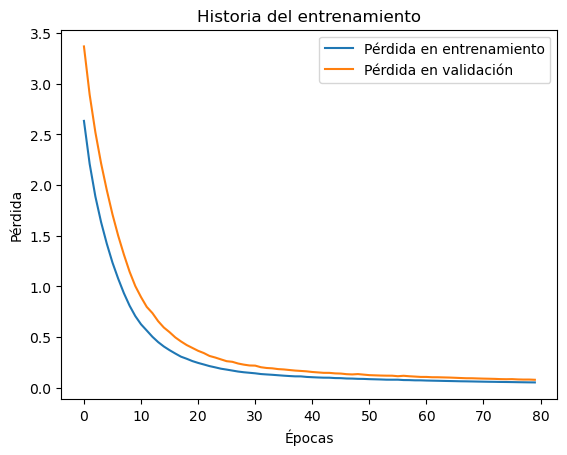

In [127]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape de X_train y X_test para que tenga el formato adecuado: (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Crear el modelo RNN con una sola capa
model = Sequential()
model.add(SimpleRNN(12, input_shape=(X_train.shape[1], 1)))  # 50 neuronas en la capa RNN
model.add(Dense(1))  # Una salida

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

# Graficar la historia del entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Historia del entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Necesita unas 15 etapas la red con una sola capa recurrente para estabilizar su grafica de pérdidas

MODELO CON MÁS CAPAS RNN 

Epoch 1/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.6534 - val_loss: 3.5040
Epoch 2/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2612 - val_loss: 2.6270
Epoch 3/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7487 - val_loss: 2.1326
Epoch 4/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5638 - val_loss: 1.7963
Epoch 5/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1900 - val_loss: 1.5313
Epoch 6/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0612 - val_loss: 1.2851
Epoch 7/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7665 - val_loss: 1.0755
Epoch 8/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5841 - val_loss: 0.8959
Epoch 9/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6365 - val_loss: 0.7451
Epoch 10/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4478 - val_loss: 0.6325
Epoch 11/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3896 - val_loss: 0.5439
Epoch 12/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3993 - val_loss: 0.4735

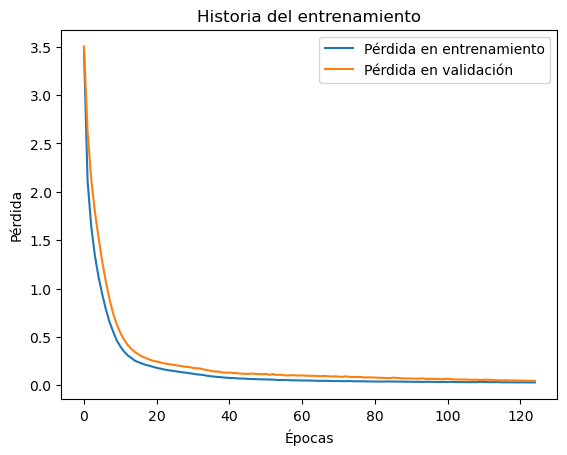

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0389
Pérdida en el conjunto de prueba: 0.0451187901198864


In [128]:
# Crear el modelo RNN con múltiples capas
model = Sequential()

# Primera capa RNN con return_sequences=True
model.add(SimpleRNN(12, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Segunda capa RNN con return_sequences=True
model.add(SimpleRNN(12, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(12, return_sequences=False))  # Última capa sin return_sequences

# Capa de salida
model.add(Dense(1))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=125, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Historia del entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

loss = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

El rendimiento ha mejorado significativamente añadiendo más capas.

MODELO CON UNA CAPA LSTM

Epoch 1/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.6870 - val_loss: 6.1243
Epoch 2/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4651 - val_loss: 5.5009
Epoch 3/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1193 - val_loss: 4.8961
Epoch 4/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2096 - val_loss: 4.3132
Epoch 5/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1708 - val_loss: 3.7475
Epoch 6/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7144 - val_loss: 3.2237
Epoch 7/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1375 - val_loss: 2.7529
Epoch 8/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1316 - val_loss: 2.3203
Epoch 9/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5430 - val_loss: 1.9608
Epoch 10/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3895 - val_loss: 1.6687
Epoch 11/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1824 - val_loss: 1.4262
Epoch 12/125
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9973 - val_loss: 1.2318

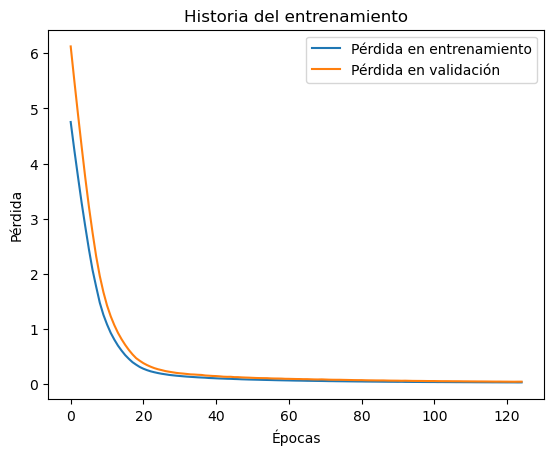

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401
Pérdida en el conjunto de prueba: 0.04611486941576004


In [132]:
# Crear el modelo LSTM con una sola capa
model = Sequential()
model.add(LSTM(12, input_shape=(X_train.shape[1], 1)))  # 50 neuronas en la capa LSTM
model.add(Dense(1))  # Una salida

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=125, batch_size=32, validation_data=(X_test, y_test))
# Evaluar el modelo
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Historia del entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

In [ ]:
# Crear el modelo LSTM con múltiples capas
model = Sequential()

# Primera capa LSTM con return_sequences=True
model.add(LSTM(12, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Segunda capa LSTM con return_sequences=True
model.add(LSTM(12, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(LSTM(12, return_sequences=False))  
# Última capa sin return_sequences

# Capa de salida
model.add(Dense(1))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=125, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

Epoch 1/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 6.0137 - val_loss: 7.8899
Epoch 2/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6410 - val_loss: 7.2718
Epoch 3/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7946 - val_loss: 6.3467
Epoch 4/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3252 - val_loss: 5.0721
Epoch 5/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5725 - val_loss: 3.7520
Epoch 6/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5632 - val_loss: 2.8400
Epoch 7/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0678 - val_loss: 2.2987
Epoch 8/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5000 - val_loss: 1.9356
Epoch 9/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4311 - val_loss: 1.6177
Epoch 10/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1364 - val_loss: 1.3794
Epoch 11/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8718 - val_loss: 1.2151
Epoch 12/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7837 - val_loss: 1.0

Vemos que no tiene sentido que utilicemos el ID para un algoritmo de predicción ya que al ser random no tiene nada que ver con las predicciones.

**4** Elimina los outliers y vuelve a representar los datos

Analizando los datos vemos que hay muchos valores NAN,los vamos a eliminar.

Creo una primera version del modelo

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Codificar las clases: 'benigno' -> 0, 'maligno' -> 1
data["clase"] = encoder.fit_transform(data['clase'])
y = data["clase"]  # Variable objetivo (la columna 'classe')
X = data.drop(columns=["clase"])  # Características (todo menos 'classe')


/tmp/ipykernel_10540/1710813634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clase"] = encoder.fit_transform(data['clase'])


In [ ]:
#print(X)
#print(y)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")



0
Matriz de confusión:
[[84  3]
 [ 3 47]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

1
Matriz de confusión:
[[90  0]
 [ 2 45]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.96      0.98        47

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

2
Matriz de confusión:
[[79  4]
 [ 2 52]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        83
           1       0.93      0.96

Obtengo los coeficientes del modelo para ver como influyen las diferentes caracteísticas en la predicción del ultimo modelo creado por ejemplo

Exlorando este primer modelo vemos que los mayores coeficientes ordenados de mayor a menor son:V7,V1 y V6(muy igualado con V4 Y V9)

Con la información que has conseguido del análisis realizado, crea un primera versión de un regresor logístico que utilice una única característica. ¿Qué característica vas a utilizar? ¿Por qué has elegido esa característica?

Voy a crear un modelo con la única caractrística V7 ya que es la que mayor coeficiente tiene y por tanto es la que más interviene en la predicción.

In [ ]:
y = data["clase"]  # Variable objetivo (la columna 'classe')
#usamos dos corchetes para indicar que X es un Dataframe y no un vector
#  unidimensional Serie,ya que sino da error en el metodo fit
X = data[["V7"]]  # Característica V7 soolo
#print(y)
#print(X)

n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    #print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")

Matriz de confusión:
[[82  5]
 [ 7 43]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        87
           1       0.90      0.86      0.88        50

    accuracy                           0.91       137
   macro avg       0.91      0.90      0.90       137
weighted avg       0.91      0.91      0.91       137

Matriz de confusión:
[[89  1]
 [ 9 38]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        90
           1       0.97      0.81      0.88        47

    accuracy                           0.93       137
   macro avg       0.94      0.90      0.92       137
weighted avg       0.93      0.93      0.93       137

Matriz de confusión:
[[78  5]
 [11 43]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        83
           1       0.90      0.80      

Obtenemos un R2 score de 0.59,muy inferior al anterior de 0.82(con todas las características)

Amplia el número de características a dos. ¿Cuál es la segunda característica que has seleccionado? ¿Por qué la has seleccionado? ¿Han mejorado los resultados? ¿Cuanto han mejorado?

La segunda en orden de influencia es V1 por tanto las 2 caracterísitcas que voy a usar son : V1 y V7

In [ ]:

y = data["clase"]  # Variable objetivo (la columna 'classe')
#usamos dos corchetes para indicar que X es un Dataframe y no un vector
#  unidimensional Serie,ya que sino da error en el metodo fit
X = data[["V7","V1"]]  # Característica V7 soolo
print(y)
print(X)

n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")


0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: clase, Length: 683, dtype: int64
     V7  V1
0     3   5
1     3   5
2     3   3
3     3   6
4     3   4
..   ..  ..
694   1   3
695   1   2
696   8   5
697  10   4
698  10   4

[683 rows x 2 columns]
0
Matriz de confusión:
[[86  1]
 [ 4 46]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       0.98      0.92      0.95        50

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137

1
Matriz de confusión:
[[89  1]
 [ 4 43]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.91      0.95        47

    accuracy                           0.96       137
   macro avg 

Nuestro modelo ha mejorado respecto al anterior pero sigue siendo ligeramente inferior al primer modelo que usaba todas las características.

Siguen ampliando el número de características justificando el orden de inclusión. ¿Cómo mejoran los resultados al ir añadiendo nuevas características?

Las siguientes 3 características que voy a añadir a la lista de características van a ser V6 ,V4 Y V9 ya eran las 3 características que empataban(prácticamente) en el tercer puesto de características con más influencia en la predición del modelo con todas las características.




In [ ]:

y = data["clase"]  # Variable objetivo (la columna 'classe')
#usamos dos corchetes para indicar que X es un Dataframe y no un vector
#  unidimensional Serie,ya que sino da error en el metodo fit
X = data[["V7","V1","V6","V4","V9"]]  # Característica V7 soolo
print(y)
print(X)

n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")


0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: clase, Length: 683, dtype: int64
     V7  V1    V6  V4  V9
0     3   5   1.0   1   1
1     3   5  10.0   5   1
2     3   3   2.0   1   1
3     3   6   4.0   1   1
4     3   4   1.0   3   1
..   ..  ..   ...  ..  ..
694   1   3   2.0   1   1
695   1   2   1.0   1   1
696   8   5   3.0   3   2
697  10   4   4.0   4   1
698  10   4   5.0   5   1

[683 rows x 5 columns]
0
Matriz de confusión:
[[85  2]
 [ 3 47]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        87
           1       0.96      0.94      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

1
Matriz de confusión:
[[90  0]
 [ 2 45]]
Reporte de clasificación:
              precision    recall  f1-score   support

        

Utilizando las características V7,V1,V6,V4 Y V9 obtenemos un r2score de 0.843,es decir un mejor rendimiento que el modelo que utilizaba todas las características